In [ ]:
# 기본 easyOCR
import easyocr
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np

# # EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
# reader = easyocr.Reader(['en', 'ko'], gpu=False)

# CRAFT 탐지 모델과 기본 인식 모델을 사용하는 리더
reader = easyocr.Reader(['en', 'ko'], detector='craft', recognizer='standard', gpu=False)

# # DB 탐지 모델과 경량 인식 모델을 사용하는 리더
# reader_lite = easyocr.Reader(['en', 'ko'], detector='db', recognizer='lite', gpu=False)

# 이미지 파일 경로
# img_path = 'hand_text2.png'
img_path = 'image00001.jpg'
# OpenCV를 사용하여 이미지 읽기 (기본적으로 BGR 형식)
image_bgr = cv2.imread(img_path)

# # BGR에서 RGB로 변환
# image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# EasyOCR을 사용하여 텍스트 인식
result = reader.readtext(image_bgr)
# result = reader_lite.readtext(image_bgr)


# 텍스트와 위치를 이미지에 표시
for (bbox, text, prob) in result:
    # # bbox는 네 개의 좌표 (top_left, top_right, bottom_right, bottom_left)로 구성됨
    # (top_left, top_right, bottom_right, bottom_left) = bbox
    # # bbox를 기준으로 사각형 그리기
    # cv2.rectangle(image_bgr, tuple(map(int, top_left)), tuple(map(int, bottom_right)), (0, 255, 0), 2)
    print(text)

# 이미지를 matplotlib을 사용하여 표시
# plt.figure(figsize=(10, 10))
# plt.imshow(image_bgr)
# plt.axis('off')
# plt.show()

# import easyocr
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np

# # EasyOCR 리더 초기화 (예: 영어와 한국어 지원)
# reader = easyocr.Reader(['en', 'ko'], detector='craft', recognizer='standard', gpu=False)

# # 이미지 파일 경로
# img_path = 'hand_text.png'

# # OpenCV를 사용하여 이미지 읽기 (기본적으로 BGR 형식)
# image_bgr = cv2.imread(img_path)

# # EasyOCR을 사용하여 텍스트 인식
# result = reader.readtext(image_bgr)

# # 텍스트와 위치를 이미지에 표시
# for (bbox, text, prob) in result:
#     # bbox는 네 개의 좌표 (top_left, top_right, bottom_right, bottom_left)로 구성됨
#     bbox = np.array(bbox).astype(np.int32)
#     # bbox를 기준으로 다각형 그리기
#     cv2.polylines(image_bgr, [bbox], isClosed=True, color=(0, 255, 0), thickness=2)
#     print(text)

# # 이미지를 matplotlib을 사용하여 표시
# plt.figure(figsize=(10, 10))
# plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()


Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [13]:
# 탐지만 easyOCR, 인식은 paddleOCR, teseract OCR
import easyocr
import paddleocr
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

# EasyOCR 탐지 모델 초기화
easy_reader = easyocr.Reader(['en', 'ko'], gpu=False)

# PaddleOCR 인식 모델 초기화
paddle_reader = paddleocr.PaddleOCR(use_angle_cls=True, 
                          lang='korean', 
                          det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                          rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                          use_gpu=False)

# 이미지 파일 경로
img_path = 'hand_text.png'

# 이미지 읽기 (OpenCV)
image_bgr = cv2.imread(img_path)

# EasyOCR로 텍스트 영역 탐지
easy_result = easy_reader.readtext(image_bgr, detail=1)

# 결과를 저장할 리스트
texts_paddle = []
texts_tesseract = []

# PaddleOCR로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = int(min(top_left[0], bottom_left[0]))
    x_max = int(max(top_right[0], bottom_right[0]))
    y_min = int(min(top_left[1], top_right[1]))
    y_max = int(max(bottom_left[1], bottom_right[1]))

    # 영역 추출 및 전처리
    cropped_img = image_bgr[y_min:y_max, x_min:x_max]
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    # PaddleOCR로 텍스트 인식
    paddle_result = paddle_reader.ocr(cropped_img_rgb, cls=True)
    for line in paddle_result:
        for word_info in line:
            text = word_info[1][0]
            texts_paddle.append(text)
            # 결과 시각화
            cv2.rectangle(image_bgr, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image_bgr, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tesseract로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = int(min(top_left[0], bottom_left[0]))
    x_max = int(max(top_right[0], bottom_right[0]))
    y_min = int(min(top_left[1], top_right[1]))
    y_max = int(max(bottom_left[1], bottom_right[1]))

    # 영역 추출 및 전처리
    cropped_img = image_bgr[y_min:y_max, x_min:x_max]
    cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Tesseract로 텍스트 인식
    text = pytesseract.image_to_string(cropped_img_gray, lang='kor')
    texts_tesseract.append(text)

# 인식된 텍스트 출력
print("Recognized Texts by PaddleOCR:")
for text in texts_paddle:
    print(text)

print("\nRecognized Texts by Tesseract OCR:")
for text in texts_tesseract:
    print(text)

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('OCR Result (EasyOCR detection + PaddleOCR and Tesseract recognition)')
plt.axis('off')
plt.show()


[2024-07-12 07:34:18,482] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


[2024/07/12 07:34:21] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

TypeError: 'NoneType' object is not iterable

In [14]:
# 탐지만 easyOCR, 인식은 paddleOCR, teseract OCR , 박스영역 체크
import easyocr
import paddleocr
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

# EasyOCR 탐지 모델 초기화
easy_reader = easyocr.Reader(['en', 'ko'], gpu=False)

# PaddleOCR 인식 모델 초기화
paddle_reader = paddleocr.PaddleOCR(use_angle_cls=True, 
                          lang='korean', 
                          det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                          rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                          use_gpu=False)

# 이미지 파일 경로
img_path = 'hand_text.png'

# 이미지 읽기 (OpenCV)
image_bgr = cv2.imread(img_path)

# EasyOCR로 텍스트 영역 탐지
easy_result = easy_reader.readtext(image_bgr, detail=1)

# 결과를 저장할 리스트
texts_paddle = []
texts_tesseract = []

# PaddleOCR로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = int(min(top_left[0], bottom_left[0]))
    x_max = int(max(top_right[0], bottom_right[0]))
    y_min = int(min(top_left[1], top_right[1]))
    y_max = int(max(bottom_left[1], bottom_right[1]))

    # 영역 추출 및 전처리
    cropped_img = image_bgr[y_min:y_max, x_min:x_max]
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

    # PaddleOCR로 텍스트 인식
    paddle_result = paddle_reader.ocr(cropped_img_rgb, cls=True)
    for line in paddle_result:
        for word_info in line:
            text = word_info[1][0]
            texts_paddle.append(text)
            # 결과 시각화
            cv2.rectangle(image_bgr, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.rectangle(image_bgr, (x_min+5, y_min+5), (x_max-5, y_max-5), (255, 0, 0), 2)  # PaddleOCR 인식 영역

# Tesseract로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = int(min(top_left[0], bottom_left[0]))
    x_max = int(max(top_right[0], bottom_right[0]))
    y_min = int(min(top_left[1], top_right[1]))
    y_max = int(max(bottom_left[1], bottom_right[1]))

    # 영역 추출 및 전처리
    cropped_img = image_bgr[y_min:y_max, x_min:x_max]
    cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

    # Tesseract로 텍스트 인식
    text = pytesseract.image_to_string(cropped_img_gray, lang='kor')
    texts_tesseract.append(text)
    # 결과 시각화
    cv2.rectangle(image_bgr, (x_min+10, y_min+10), (x_max-10, y_max-10), (0, 0, 255), 2)  # Tesseract 인식 영역

# 인식된 텍스트 출력
print("Recognized Texts by PaddleOCR:")
for text in texts_paddle:
    print(text)

print("\nRecognized Texts by Tesseract OCR:")
for text in texts_tesseract:
    print(text)

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('OCR Result (EasyOCR detection + PaddleOCR and Tesseract recognition)')
plt.axis('off')
plt.show()


[2024-07-12 07:35:16,447] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


[2024/07/12 07:35:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

TypeError: 'NoneType' object is not iterable

[2024-07-12 08:08:18,888] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.


[2024/07/12 08:08:22] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

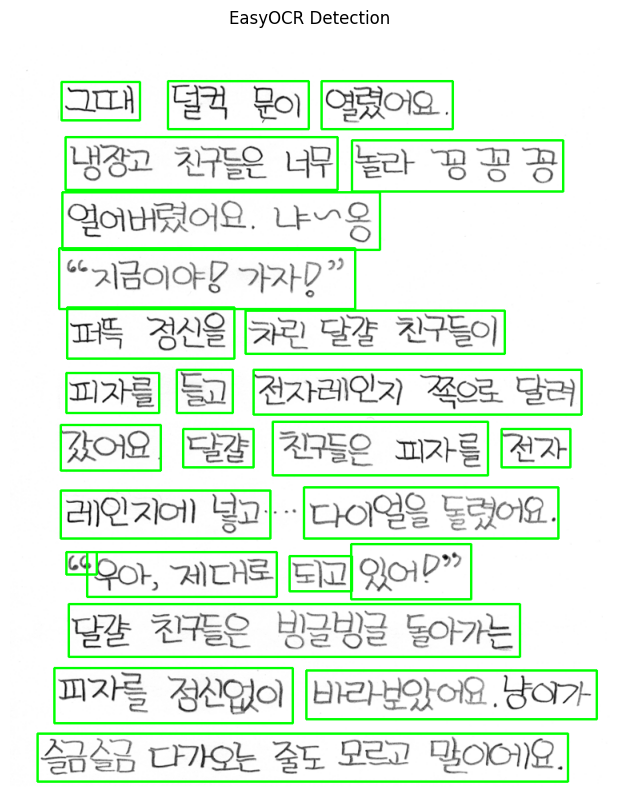

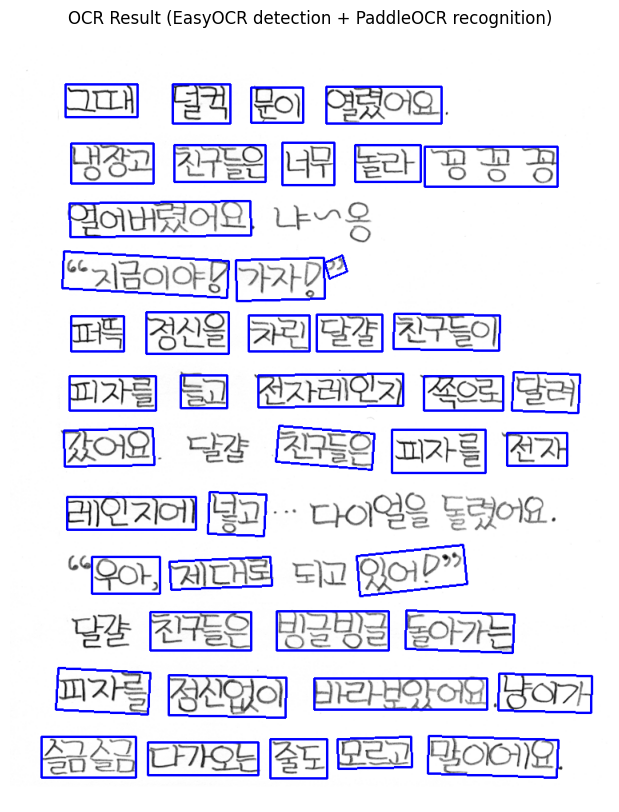

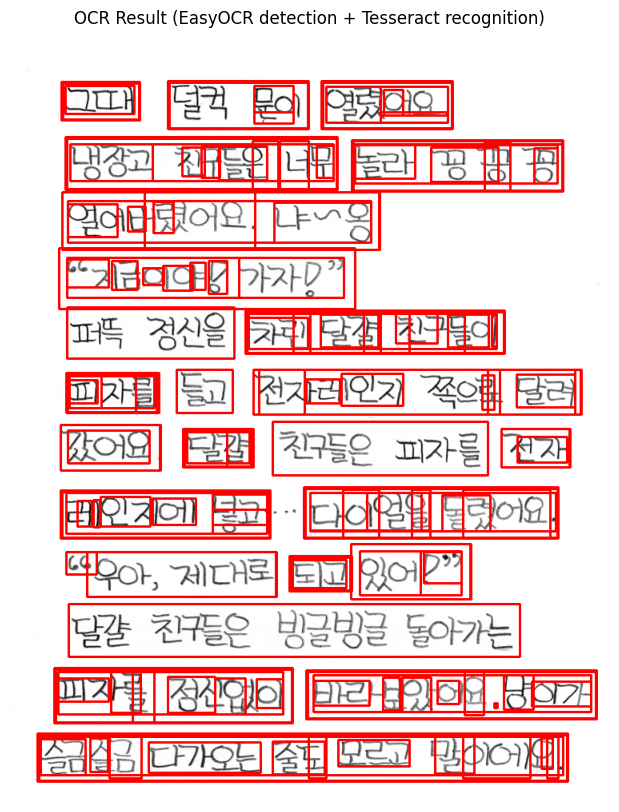

In [3]:
import easyocr
import paddleocr
import pytesseract
import cv2
import numpy as np
from matplotlib import pyplot as plt

# EasyOCR 탐지 모델 초기화
easy_reader = easyocr.Reader(['en', 'ko'], gpu=False)

# PaddleOCR 인식 모델 초기화
paddle_reader = paddleocr.PaddleOCR(use_angle_cls=True, 
                                    lang='korean', 
                                    det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                                    rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                                    use_gpu=False)

# 이미지 파일 경로
img_path = 'hand_text2.png'

# 이미지 읽기 (OpenCV)
image_bgr = cv2.imread(img_path)
image_paddle = image_bgr.copy()
image_tesseract = image_bgr.copy()

# EasyOCR로 텍스트 영역 탐지
easy_result = easy_reader.readtext(image_bgr, detail=1)

# EasyOCR 탐지 결과 시각화
for bbox, _, _ in easy_result:
    bbox = np.array(bbox).astype(np.int32)
    cv2.polylines(image_bgr, [bbox], True, (0, 255, 0), 2)  # EasyOCR 탐지 영역

# 결과를 저장할 리스트
texts_paddle = []
texts_tesseract = []

# PaddleOCR로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = max(0, int(min(top_left[0], bottom_left[0])))
    x_max = min(image_bgr.shape[1], int(max(top_right[0], bottom_right[0])))
    y_min = max(0, int(min(top_left[1], top_right[1])))
    y_max = min(image_bgr.shape[0], int(max(bottom_left[1], bottom_right[1])))

    # 영역 추출 및 전처리
    if y_max > y_min and x_max > x_min:
        cropped_img = image_bgr[y_min:y_max, x_min:x_max]
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

        # PaddleOCR로 텍스트 인식
        paddle_result = paddle_reader.ocr(cropped_img_rgb, cls=True)
        if paddle_result is not None:
            for line in paddle_result:
                if line is not None:
                    for word_info in line:
                        text = word_info[1][0]
                        texts_paddle.append(text)
                        # 결과 시각화
                        word_bbox = word_info[0]
                        word_bbox = np.array(word_bbox).astype(np.int32)
                        word_bbox[:, 0] += x_min
                        word_bbox[:, 1] += y_min
                        cv2.polylines(image_paddle, [word_bbox], True, (255, 0, 0), 2)  # PaddleOCR 인식 영역

# Tesseract로 텍스트 인식
for bbox, _, _ in easy_result:
    top_left, top_right, bottom_right, bottom_left = bbox
    x_min = max(0, int(min(top_left[0], bottom_left[0])))
    x_max = min(image_bgr.shape[1], int(max(top_right[0], bottom_right[0])))
    y_min = max(0, int(min(top_left[1], top_right[1])))
    y_max = min(image_bgr.shape[0], int(max(bottom_left[1], bottom_right[1])))

    # 영역 추출 및 전처리
    if y_max > y_min and x_max > x_min:
        cropped_img = image_bgr[y_min:y_max, x_min:x_max]
        cropped_img_gray = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)

        # Tesseract로 텍스트 인식
        d = pytesseract.image_to_data(cropped_img_gray, output_type=pytesseract.Output.DICT, lang='kor')
        n_boxes = len(d['level'])
        for i in range(n_boxes):
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            cv2.rectangle(image_tesseract, (x_min + x, y_min + y), (x_min + x + w, y_min + y + h), (0, 0, 255), 2)
            texts_tesseract.append(d['text'][i])

# 인식된 텍스트 출력
print("Recognized Texts by PaddleOCR:")
for text in texts_paddle:
    print(text)

print("\nRecognized Texts by Tesseract OCR:")
for text in texts_tesseract:
    print(text)

# EasyOCR 탐지 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('EasyOCR Detection')
plt.axis('off')
plt.show()

# PaddleOCR 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_paddle, cv2.COLOR_BGR2RGB))
plt.title('OCR Result (EasyOCR detection + PaddleOCR recognition)')
plt.axis('off')
plt.show()

# Tesseract 결과 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_tesseract, cv2.COLOR_BGR2RGB))
plt.title('OCR Result (EasyOCR detection + Tesseract recognition)')
plt.axis('off')
plt.show()


[2024/07/12 07:32:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_tex

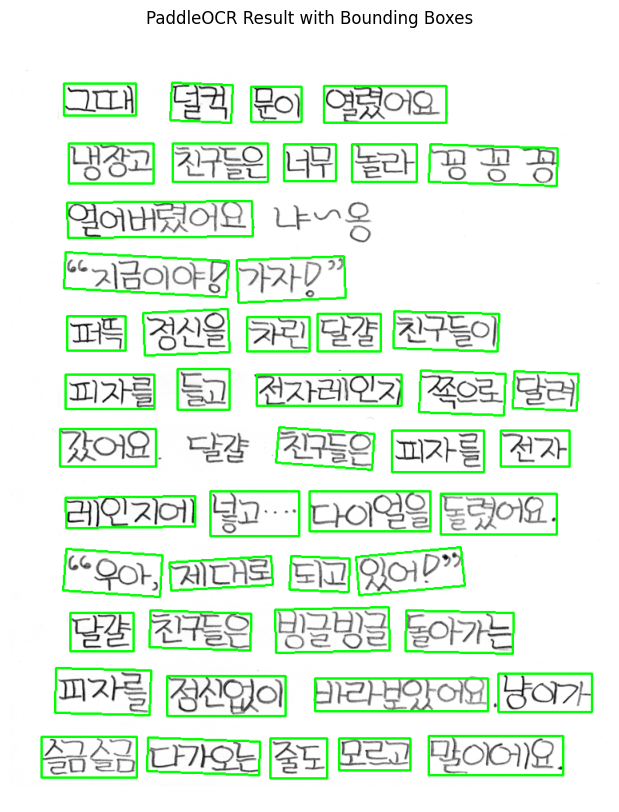

In [11]:
# paddleOCR
import paddleocr
import cv2
import numpy as np
from matplotlib import pyplot as plt

# PaddleOCR 인식 모델 초기화
paddle_reader = paddleocr.PaddleOCR(use_angle_cls=True, 
                                    lang='korean', 
                                    det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer',
                                    rec_model_dir='/root/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer',  
                                    use_gpu=False)

# 이미지 파일 경로
img_path = 'hand_text2.png'

# 이미지 읽기 (OpenCV)
image_bgr = cv2.imread(img_path)

# PaddleOCR로 텍스트 인식
paddle_result = paddle_reader.ocr(img_path, cls=True)

# 인식된 텍스트와 위치 정보 출력 및 줄 맞추기
lines = []
for line in paddle_result:
    line_text = []
    for word_info in line:
        text = word_info[1][0]
        line_text.append(text)
    lines.append(' '.join(line_text))

# 줄 맞춘 텍스트 출력
print("Recognized Text (Line by Line):")
for line in lines:
    print(line)

# 결과 시각화
for line in paddle_result:
    for word_info in line:
        bbox = word_info[0]
        bbox = np.array(bbox).astype(np.int32).reshape((-1, 1, 2))
        cv2.polylines(image_bgr, [bbox], True, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('PaddleOCR Result with Bounding Boxes')
plt.axis('off')
plt.show()


Recognized Text:
그때 덜걱 문1 열였0으.

냉장고 찬7들은 4무 놀라 평꼼공

옆어버렸어요. 냐옹

…지금이야 가자”

꾼득 정신을 긋린 달샴 친구들이

피자를 들 전자레인지 쪽@5. 날려
갔어요. 딸샴 진7들은 교자를 전자
러]인지어 널고… 다이얻을 놀렸어요.
“으아, 제다트 되고 있어”?

달솔 친7들은 빔글빙글 덜아가는
피자를 점신없이 바라부았09.남여가
슬급슬금 다가오는 줄도 모르고 말0001)요.



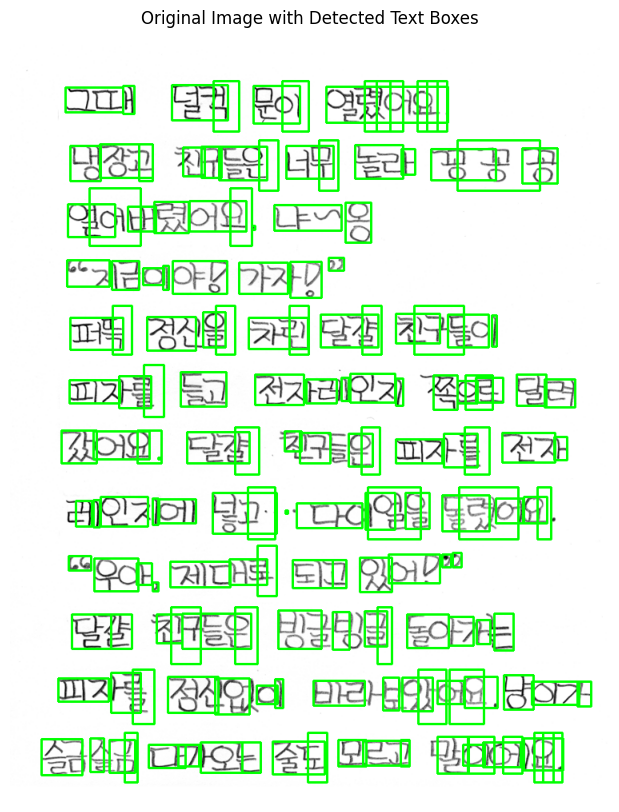

In [12]:
# Tesseract OCR
import cv2
import pytesseract
from matplotlib import pyplot as plt

# 이미지 파일 경로
image_path = 'hand_text2.png'

# 이미지 읽기
image = cv2.imread(image_path)

# 그레이스케일 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tesseract로 텍스트 인식
text = pytesseract.image_to_string(gray, lang='kor')  # 필요에 따라 언어 코드를 변경하세요.

# 인식된 텍스트 출력
print("Recognized Text:")
print(text)

# Tesseract로 박스 정보 얻기
boxes = pytesseract.image_to_boxes(gray, lang='kor')  # 각 문자에 대한 경계 상자 얻기

# 박스를 이미지에 그리기
h, w, _ = image.shape
for box in boxes.splitlines():
    box = box.split(' ')
    x, y, x2, y2 = int(box[1]), int(box[2]), int(box[3]), int(box[4])
    cv2.rectangle(image, (x, h - y), (x2, h - y2), (0, 255, 0), 2)

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Text Boxes')
plt.axis('off')
plt.show()
